# Bragg peak demonstration -- Task 1

In [2]:
#Initializing Python
import numpy as np
import matplotlib.pyplot as plt

We first get the stopping power for water from PSTAR: https://www.physics.nist.gov/PhysRefData/Star/Text/PSTAR.html

For this demonstration, we check ALL the columns and SPACE delimiter, and download to `PSTAR.txt`.

In [18]:
#Loading data from PSTAR.txt, skipping the first 8 lines (headers) and returning one big matrix
data = np.loadtxt('PSTAR.txt', skiprows=8, unpack=True)

#Water density
dens = 1.0 #[g/cm^3]

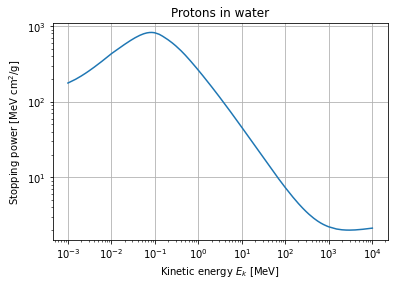

In [26]:
#Plot data
plt.loglog(data[0][:],data[3][:])
plt.xlabel(r'Kinetic energy $E_k$ [MeV]')
plt.ylabel(r'Stopping power [MeV cm$^2$/g]')
plt.title('Protons in water')
plt.grid()

plt.show()

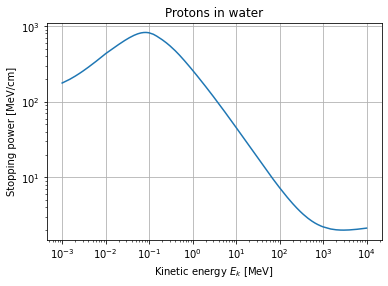

In [36]:
#Transform to get rid of the density normalization and plot

Ek = data[0][:]
Eloss = data[3][:] * dens;

plt.loglog(Ek, Eloss)
plt.xlabel(r'Kinetic energy $E_k$ [MeV]')
plt.ylabel(r'Stopping power [MeV/cm]')
plt.title('Protons in water')
plt.grid()

plt.show()

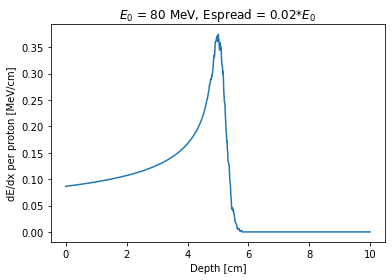

In [64]:
# Compute energy loss as a function of depth,
# using the average energy loss given by PSTAR

# Simulation parameters
NPART = 500

E0 = 80 #[MeV]
Espread = 0.02 #Fraction of E0

dz = 0.01 #[cm]

# Arrays to save the data
z = np.arange(0,10+dz/2,dz) #[cm]
dEdz = np.zeros_like(z) #[MeV/cm]

# Compute!
for i in range(NPART):
    E = np.random.normal(E0, E0*Espread) #[MeV]
    
    for k in range(len(z)):
        lastStep = False
        
        dE = np.interp(E,Ek,Eloss)*dz #[MeV]
        #print(k,E,dE)
        if dE >= E:
            dE = E
            lastStep = True
        
        dEdz[k] += dE
        E    -= dE
        
        if lastStep:
            #print (k)
            break;

# Plot
plt.plot(z, dEdz/NPART)
plt.title('$E_0$ = {} MeV, Espread = {}*$E_0$'.format(E0, Espread))
plt.xlabel('Depth [cm]')
plt.ylabel('dE/dx per proton [MeV/cm]')
plt.show()